In [133]:
import pandas as pd
import numpy as np
pd.set_option("display.max_rows", 14000)
pd.set_option("display.max_columns", 101)


import warnings
warnings.filterwarnings('ignore')

In [134]:
bill_amount_df=pd.read_csv('bill_amount.csv')
print(bill_amount_df.shape)
bill_amount_df.head()

(13600, 2)


,bill_id,amount
0,40315104,1552.634830
1,2660045161,1032.011951
2,1148334643,6469.605351
3,3818426276,755.965425
4,9833541918,897.347816


In [135]:
demographics_df=pd.read_csv('demographics.csv')
print(demographics_df.shape)
demographics_df.head()

(3000, 5)


,patient_id,gender,race,resident_status,date_of_birth
0,fa2d818b2261e44e30628ad1ac9cc72c,Female,Indian,Singaporean,1971-05-14
1,5b6477c5de78d0b138e3b0c18e21d0ae,f,Chinese,Singapore citizen,1976-02-18
2,320aa16c61937447fd6631bf635e7fde,Male,Chinese,Singapore citizen,1982-07-03
3,c7f3881684045e6c49020481020fae36,Male,Malay,Singapore citizen,1947-06-15
4,541ad077cb4a0e64cc422673afe28aef,m,Chinese,Singaporean,1970-12-12


In [136]:
bill_id_df=pd.read_csv('bill_id.csv')
print(bill_id_df.shape)
bill_id_df.head()

(13600, 3)


,bill_id,patient_id,date_of_admission
0,7968360812,1d21f2be18683991eb93d182d6b2d220,2011-01-01
1,6180579974,62bdca0b95d97e99e1c712048fb9fd09,2011-01-01
2,7512568183,1d21f2be18683991eb93d182d6b2d220,2011-01-01
3,3762633379,62bdca0b95d97e99e1c712048fb9fd09,2011-01-01
4,7654730355,1d21f2be18683991eb93d182d6b2d220,2011-01-01


In [137]:
clinical_data_df=pd.read_csv('clinical_data.csv')
clinical_data_df.rename(columns={'id':'patient_id'},inplace=True)
print(clinical_data_df.shape)
clinical_data_df.head()

(3400, 26)


,patient_id,date_of_admission,date_of_discharge,medical_history_1,medical_history_2,medical_history_3,medical_history_4,medical_history_5,medical_history_6,medical_history_7,preop_medication_1,preop_medication_2,preop_medication_3,preop_medication_4,preop_medication_5,preop_medication_6,symptom_1,symptom_2,symptom_3,symptom_4,symptom_5,lab_result_1,lab_result_2,lab_result_3,weight,height
0,1d21f2be18683991eb93d182d6b2d220,2011-01-01,2011-01-11,0,1.0,0,0,0.0,0,0,1,0,1,0,0,1,0,0,0,1,1,13.2,30.9,123.0,71.3,161.0
1,62bdca0b95d97e99e1c712048fb9fd09,2011-01-01,2011-01-11,0,0.0,0,0,0.0,0,0,0,1,1,1,1,0,0,0,1,1,1,13.8,22.6,89.0,78.4,160.0
2,c85cf97bc6307ded0dd4fef8bad2fa09,2011-01-02,2011-01-13,0,0.0,0,0,0.0,0,0,0,1,1,1,1,1,1,1,1,1,0,11.2,26.2,100.0,72.0,151.0
3,e0397dd72caf4552c5babebd3d61736c,2011-01-02,2011-01-14,0,1.0,No,0,0.0,1,1,1,0,1,0,0,1,1,1,1,1,1,13.3,28.4,76.0,64.4,152.0
4,94ade3cd5f66f4584902554dff170a29,2011-01-08,2011-01-16,0,0.0,No,0,0.0,1,1,0,0,0,0,1,0,0,1,0,1,0,12.0,27.8,87.0,55.6,160.0


1.	Join all the files

In [138]:
print(bill_amount_df.shape)
print(bill_id_df.shape)
print(demographics_df.shape)
print(clinical_data_df.shape)

(13600, 2)
(13600, 3)
(3000, 5)
(3400, 26)


In [139]:
clinical_data_df['patient_id'].unique().shape[0]

3000

In [140]:
demographics_df['patient_id'].unique().shape[0]

3000

In [141]:
bill_id_df['patient_id'].unique().shape[0]

3000

In [142]:
x=clinical_data_df.groupby('patient_id')[['medical_history_1']].count()
x[x.medical_history_1>1].shape[0]

379

In [143]:
bill_df=bill_id_df.merge(bill_amount_df, on='bill_id')
bill_df.head()

,bill_id,patient_id,date_of_admission,amount
0,7968360812,1d21f2be18683991eb93d182d6b2d220,2011-01-01,951.214467
1,6180579974,62bdca0b95d97e99e1c712048fb9fd09,2011-01-01,19900.297086
2,7512568183,1d21f2be18683991eb93d182d6b2d220,2011-01-01,12338.269972
3,3762633379,62bdca0b95d97e99e1c712048fb9fd09,2011-01-01,1145.372193
4,7654730355,1d21f2be18683991eb93d182d6b2d220,2011-01-01,1133.601902


In [144]:
bill_demo_df=bill_df.merge(demographics_df, on = 'patient_id')
bill_demo_df.head()

,bill_id,patient_id,date_of_admission,amount,gender,race,resident_status,date_of_birth
0,7968360812,1d21f2be18683991eb93d182d6b2d220,2011-01-01,951.214467,Male,Indian,Singaporean,1976-12-19
1,7512568183,1d21f2be18683991eb93d182d6b2d220,2011-01-01,12338.269972,Male,Indian,Singaporean,1976-12-19
2,7654730355,1d21f2be18683991eb93d182d6b2d220,2011-01-01,1133.601902,Male,Indian,Singaporean,1976-12-19
3,1692196063,1d21f2be18683991eb93d182d6b2d220,2011-01-01,982.332324,Male,Indian,Singaporean,1976-12-19
4,6466235037,1d21f2be18683991eb93d182d6b2d220,2015-09-17,1498.125668,Male,Indian,Singaporean,1976-12-19


In [145]:
bill_demo_df.columns

Index(['bill_id', 'patient_id', 'date_of_admission', 'amount', 'gender',
       'race', 'resident_status', 'date_of_birth'],
      dtype='object')

In [146]:
COLS=['patient_id', 'date_of_admission', 'gender',
       'race', 'resident_status', 'date_of_birth']
bill_demo_agg_df=bill_demo_df.groupby(COLS)[['amount']].sum().reset_index().rename(columns = {'amount':'total_amount'})
bill_demo_agg_df.shape[0]

3400

In [147]:
x=bill_demo_agg_df.groupby(['patient_id','date_of_admission'])[['total_amount']].count()
print(x[x.total_amount==1].shape[0])
print(x[x.total_amount>1].shape[0])
x.head()

3400
0


,,total_amount
patient_id,date_of_admission,
00225710a878eff524a1d13be817e8e2,2014-04-10,1
0029d90eb654699c18001c17efb0f129,2012-11-07,1
0040333abd68527ecb53e1db9073f52e,2013-01-19,1
00473b58e3dc8ae37b3cb34069705083,2014-02-10,1
0078662d1d983dde68ea057c42d5b5cf,2012-04-28,1


In [148]:
bill_demo_agg_df[bill_demo_agg_df.patient_id=='0040333abd68527ecb53e1db9073f52e']

,patient_id,date_of_admission,gender,race,resident_status,date_of_birth,total_amount
2,0040333abd68527ecb53e1db9073f52e,2013-01-19,Male,India,Singaporean,1972-08-26,17447.181635


In [149]:
df=clinical_data_df.merge(bill_demo_agg_df,on=['patient_id','date_of_admission'],how='inner')
df.head()

,patient_id,date_of_admission,date_of_discharge,medical_history_1,medical_history_2,medical_history_3,medical_history_4,medical_history_5,medical_history_6,medical_history_7,preop_medication_1,preop_medication_2,preop_medication_3,preop_medication_4,preop_medication_5,preop_medication_6,symptom_1,symptom_2,symptom_3,symptom_4,symptom_5,lab_result_1,lab_result_2,lab_result_3,weight,height,gender,race,resident_status,date_of_birth,total_amount
0,1d21f2be18683991eb93d182d6b2d220,2011-01-01,2011-01-11,0,1.0,0,0,0.0,0,0,1,0,1,0,0,1,0,0,0,1,1,13.2,30.9,123.0,71.3,161.0,Male,Indian,Singaporean,1976-12-19,15405.418665
1,62bdca0b95d97e99e1c712048fb9fd09,2011-01-01,2011-01-11,0,0.0,0,0,0.0,0,0,0,1,1,1,1,0,0,0,1,1,1,13.8,22.6,89.0,78.4,160.0,Female,Malay,Singaporean,1978-07-20,23303.000924
2,c85cf97bc6307ded0dd4fef8bad2fa09,2011-01-02,2011-01-13,0,0.0,0,0,0.0,0,0,0,1,1,1,1,1,1,1,1,1,0,11.2,26.2,100.0,72.0,151.0,Female,Indian,Singaporean,1967-08-14,16813.123088
3,e0397dd72caf4552c5babebd3d61736c,2011-01-02,2011-01-14,0,1.0,No,0,0.0,1,1,1,0,1,0,0,1,1,1,1,1,1,13.3,28.4,76.0,64.4,152.0,Female,Chinese,PR,1967-12-06,27994.878530
4,94ade3cd5f66f4584902554dff170a29,2011-01-08,2011-01-16,0,0.0,No,0,0.0,1,1,0,0,0,0,1,0,0,1,0,1,0,12.0,27.8,87.0,55.6,160.0,Female,Others,PR,1982-07-18,10707.950907


In [150]:
print(df.duplicated().sum())
print(df.duplicated('patient_id').sum())

0
400


2.	Compute age of the patients: patient_age

In [151]:
from datetime import datetime
df['patient_age']=datetime.today().year - pd.to_datetime(df.date_of_birth, format='%Y-%m-%d').dt.year
df.loc[:,['date_of_birth','patient_age']]

,date_of_birth,patient_age
0,1976-12-19,45
1,1978-07-20,43
2,1967-08-14,54
3,1967-12-06,54
4,1982-07-18,39
5,1974-01-14,47
6,1934-04-24,87
7,1961-12-23,60
8,1967-06-04,54
9,1936-04-05,85


3.	Replace Male -> ‘M’, female -> ‘F’

In [152]:
df.gender.unique()

array(['Male', 'Female', 'm', 'f'], dtype=object)

In [153]:
df['gender_E']=df.gender.apply(lambda i:'F' if i.lower() in ('f','female') else 'M')
df.head()

,patient_id,date_of_admission,date_of_discharge,medical_history_1,medical_history_2,medical_history_3,medical_history_4,medical_history_5,medical_history_6,medical_history_7,preop_medication_1,preop_medication_2,preop_medication_3,preop_medication_4,preop_medication_5,preop_medication_6,symptom_1,symptom_2,symptom_3,symptom_4,symptom_5,lab_result_1,lab_result_2,lab_result_3,weight,height,gender,race,resident_status,date_of_birth,total_amount,patient_age,gender_E
0,1d21f2be18683991eb93d182d6b2d220,2011-01-01,2011-01-11,0,1.0,0,0,0.0,0,0,1,0,1,0,0,1,0,0,0,1,1,13.2,30.9,123.0,71.3,161.0,Male,Indian,Singaporean,1976-12-19,15405.418665,45,M
1,62bdca0b95d97e99e1c712048fb9fd09,2011-01-01,2011-01-11,0,0.0,0,0,0.0,0,0,0,1,1,1,1,0,0,0,1,1,1,13.8,22.6,89.0,78.4,160.0,Female,Malay,Singaporean,1978-07-20,23303.000924,43,F
2,c85cf97bc6307ded0dd4fef8bad2fa09,2011-01-02,2011-01-13,0,0.0,0,0,0.0,0,0,0,1,1,1,1,1,1,1,1,1,0,11.2,26.2,100.0,72.0,151.0,Female,Indian,Singaporean,1967-08-14,16813.123088,54,F
3,e0397dd72caf4552c5babebd3d61736c,2011-01-02,2011-01-14,0,1.0,No,0,0.0,1,1,1,0,1,0,0,1,1,1,1,1,1,13.3,28.4,76.0,64.4,152.0,Female,Chinese,PR,1967-12-06,27994.878530,54,F
4,94ade3cd5f66f4584902554dff170a29,2011-01-08,2011-01-16,0,0.0,No,0,0.0,1,1,0,0,0,0,1,0,0,1,0,1,0,12.0,27.8,87.0,55.6,160.0,Female,Others,PR,1982-07-18,10707.950907,39,F


4. Delete duplicate details of a patient

In [154]:
x=df.sort_values(['patient_id','date_of_admission']).drop_duplicates('patient_id')
x[x.patient_id=='feb52392f4d58a02254cbd0ba634312f']

,patient_id,date_of_admission,date_of_discharge,medical_history_1,medical_history_2,medical_history_3,medical_history_4,medical_history_5,medical_history_6,medical_history_7,preop_medication_1,preop_medication_2,preop_medication_3,preop_medication_4,preop_medication_5,preop_medication_6,symptom_1,symptom_2,symptom_3,symptom_4,symptom_5,lab_result_1,lab_result_2,lab_result_3,weight,height,gender,race,resident_status,date_of_birth,total_amount,patient_age,gender_E
59,feb52392f4d58a02254cbd0ba634312f,2011-02-05,2011-02-15,0,1.0,No,0,1.0,1,0,1,0,1,1,1,1,1,0,0,1,0,15.9,25.8,96.0,85.0,166.0,Female,Malay,Singaporean,1979-04-14,16760.752525,42,F


5.	Get patient distribution by Race

In [155]:
import seaborn as sns
import matplotlib.pyplot as plt

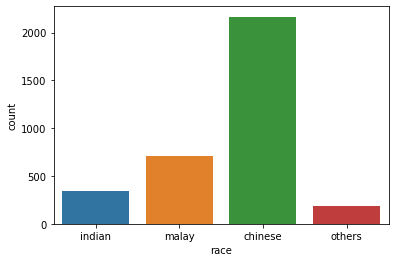

In [169]:
sns.countplot(df.race.apply(lambda x:'indian' if x=='India' else x.lower()))
plt.show()

6.	Get patient distribution by resident_status

In [158]:
df.columns

Index(['patient_id', 'date_of_admission', 'date_of_discharge',
       'medical_history_1', 'medical_history_2', 'medical_history_3',
       'medical_history_4', 'medical_history_5', 'medical_history_6',
       'medical_history_7', 'preop_medication_1', 'preop_medication_2',
       'preop_medication_3', 'preop_medication_4', 'preop_medication_5',
       'preop_medication_6', 'symptom_1', 'symptom_2', 'symptom_3',
       'symptom_4', 'symptom_5', 'lab_result_1', 'lab_result_2',
       'lab_result_3', 'weight', 'height', 'gender', 'race', 'resident_status',
       'date_of_birth', 'total_amount', 'patient_age', 'gender_E'],
      dtype='object')

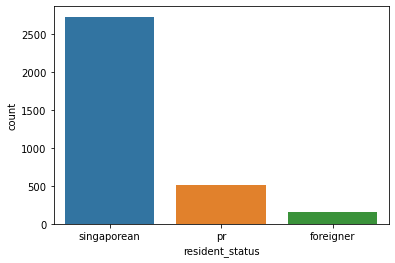

In [173]:
sns.countplot(df.resident_status.apply(lambda x:'singaporean' if x=='Singapore citizen' else x.lower()))
plt.show()

7.	What is average, max, min bill amount expensed by each patient

In [182]:
df.groupby('patient_id')[['total_amount']].describe()

total_amount                              \
                                        count          mean           std   
patient_id                                                                  
00225710a878eff524a1d13be817e8e2          1.0   5190.566695           NaN   
0029d90eb654699c18001c17efb0f129          1.0  22601.497872           NaN   
0040333abd68527ecb53e1db9073f52e          1.0  17447.181635           NaN   
00473b58e3dc8ae37b3cb34069705083          1.0  15285.883220           NaN   
0078662d1d983dde68ea057c42d5b5cf          1.0  73477.869010           NaN   
0088bbd94c90bbc9158e13465441ebb6          1.0  26051.592258           NaN   
0092d20dd0719e88ecfdd02d5e7ca7b7          1.0  21498.986758           NaN   
01081b8bcb0f9e27b888d23bb35a50dd          1.0  27512.273964           NaN   
010cf28233f50d3857b499a9c208c610          1.0  25612.364148           NaN   
0116c5d9b6c2c2e8758c75e6da86014b          1.0  15790.597745           NaN   
011f6ed96aa8a4047a7dc66219db4cd7          1.0  29910.674204           NaN   
012c5eb5397a72f8aeb64f942b60846d          2.0  25982.800725   6368.004612   
01552a3f5a9c868e6e2b2c15553dbd4a          1.0  14140.464924           NaN   
015e6ca145eb3aa52dd68440e98c9ea9          1.0  13011.336856           NaN   
016081ba470f290f4a3ea7e1484a1c13          1.0  11604.446954           NaN   
0175090ddd9e763eb4ba0c7082a3cd7b          1.0  28026.748684           NaN   
0179a0c493df7124720e1d501c40d2d0          1.0  13872.455624           NaN   
01ad0c392cc969cf3f4d74d998219a11          1.0  45214.933846           NaN   
01b158024e4954c551e0710680ce6b15          1.0  14565.555411           NaN   
01d0c142bbd90f0f60435c76ea2a1e73          1.0  20530.736130           NaN   
01d919d33166648ab24977d242f147c4          1.0  22064.852482           NaN   
0211593272c53dc0034e183600ea185f          1.0  48276.002257           NaN   
021bc85123058752e7cd8454bac7594f          1.0  30443.935320           NaN   
0230b3529ddf67d50794447d01892cf9          1.0  27156.932586           NaN   
02375302a1be7da03f29194f24d11366          1.0  13897.649834           NaN   
025af6c3b578fde9cb93846662d02e0d          1.0  22027.879159           NaN   
026efaff4d6519fae0107c3f211f31cc          1.0  27782.529961           NaN   
02787f751303a7ffa5789a9f5efe1492          1.0  29149.087408           NaN   
027eeb7475648e7362540cf898f96e65          1.0  12203.342785           NaN   
0284ec8aa1e6ced9ddaa7702b841248d          2.0  30519.888170    430.203810   
0287fc601afc9f71807f676837414a7f          1.0  20685.223523           NaN   
028ebcb33f494d0c4a8734f9c9945828          1.0  30216.955276           NaN   
02a8918f7f8eeb5967efb0899a6da1ef          1.0  47816.334539           NaN   
02c50e9ffd9283ad3cbe94d0d89135f5          1.0  53148.450629           NaN   
02cf246be7008f74dfbeff16f31ee7e1          1.0  17428.901026           NaN   
031bf442cc20e39796bea6462def2db7          1.0  21661.901591           NaN   
033a0b092d3ae08eb781cd03b3a0d44c          1.0  19712.033031           NaN   
0346c9438cb3a9e7a7ac8add6bd0c60b          1.0  25589.194941           NaN   
034c3c1f9e69c95022514bc1fa535dd9          1.0  20853.841197           NaN   
03578f3b2ca9c0763fbde638a21b424c          1.0  19700.971058           NaN   
037b8c57d20044ff30a234e4053bb500          1.0  25538.478468           NaN   
038a852800b3f6b721a5bbbf7c579ac7          1.0  14576.644864           NaN   
0397caf7f9e4795353c353052443c34f          1.0  15054.422996           NaN   
03cc3dd7b9e17f39bd338102b048bfc6          1.0  28631.676736           NaN   
03d6bdbc614a5bdbeadf5b981a59c423          2.0  20899.342573   7138.884648   
03df8267f4a581ff1326929bc3754249          1.0  18308.101799           NaN   
040c3b478b5c1c0a00037d87f1563fcb          1.0  27256.019308           NaN   
041d1a619998f7d960e03669a9327360          1.0  23389.947845           NaN   
04305de0724d6bc8d2ed1c29ed96f622          1.0  22561.692128           NaN   
0439f941b6f69b6f4d29bb32e3acc

8.	What is the average stay days of a patient in hospital

In [175]:
df['days_in_clinic']=pd.to_datetime(df.date_of_discharge, format='%Y-%m-%d')-pd.to_datetime(df.date_of_admission, format='%Y-%m-%d')
df.head()

,patient_id,date_of_admission,date_of_discharge,medical_history_1,medical_history_2,medical_history_3,medical_history_4,medical_history_5,medical_history_6,medical_history_7,preop_medication_1,preop_medication_2,preop_medication_3,preop_medication_4,preop_medication_5,preop_medication_6,symptom_1,symptom_2,symptom_3,symptom_4,symptom_5,lab_result_1,lab_result_2,lab_result_3,weight,height,gender,race,resident_status,date_of_birth,total_amount,patient_age,gender_E,days_in_clinic
0,1d21f2be18683991eb93d182d6b2d220,2011-01-01,2011-01-11,0,1.0,0,0,0.0,0,0,1,0,1,0,0,1,0,0,0,1,1,13.2,30.9,123.0,71.3,161.0,Male,Indian,Singaporean,1976-12-19,15405.418665,45,M,10 days
1,62bdca0b95d97e99e1c712048fb9fd09,2011-01-01,2011-01-11,0,0.0,0,0,0.0,0,0,0,1,1,1,1,0,0,0,1,1,1,13.8,22.6,89.0,78.4,160.0,Female,Malay,Singaporean,1978-07-20,23303.000924,43,F,10 days
2,c85cf97bc6307ded0dd4fef8bad2fa09,2011-01-02,2011-01-13,0,0.0,0,0,0.0,0,0,0,1,1,1,1,1,1,1,1,1,0,11.2,26.2,100.0,72.0,151.0,Female,Indian,Singaporean,1967-08-14,16813.123088,54,F,11 days
3,e0397dd72caf4552c5babebd3d61736c,2011-01-02,2011-01-14,0,1.0,No,0,0.0,1,1,1,0,1,0,0,1,1,1,1,1,1,13.3,28.4,76.0,64.4,152.0,Female,Chinese,PR,1967-12-06,27994.878530,54,F,12 days
4,94ade3cd5f66f4584902554dff170a29,2011-01-08,2011-01-16,0,0.0,No,0,0.0,1,1,0,0,0,0,1,0,0,1,0,1,0,12.0,27.8,87.0,55.6,160.0,Female,Others,PR,1982-07-18,10707.950907,39,F,8 days


In [179]:
df['day_in_clinic_int']=df.days_in_clinic.apply(lambda x:str(x).split(' ')[0]).astype(int)
df.head()

,patient_id,date_of_admission,date_of_discharge,medical_history_1,medical_history_2,medical_history_3,medical_history_4,medical_history_5,medical_history_6,medical_history_7,preop_medication_1,preop_medication_2,preop_medication_3,preop_medication_4,preop_medication_5,preop_medication_6,symptom_1,symptom_2,symptom_3,symptom_4,symptom_5,lab_result_1,lab_result_2,lab_result_3,weight,height,gender,race,resident_status,date_of_birth,total_amount,patient_age,gender_E,days_in_clinic,day_in_clinic_int
0,1d21f2be18683991eb93d182d6b2d220,2011-01-01,2011-01-11,0,1.0,0,0,0.0,0,0,1,0,1,0,0,1,0,0,0,1,1,13.2,30.9,123.0,71.3,161.0,Male,Indian,Singaporean,1976-12-19,15405.418665,45,M,10 days,10
1,62bdca0b95d97e99e1c712048fb9fd09,2011-01-01,2011-01-11,0,0.0,0,0,0.0,0,0,0,1,1,1,1,0,0,0,1,1,1,13.8,22.6,89.0,78.4,160.0,Female,Malay,Singaporean,1978-07-20,23303.000924,43,F,10 days,10
2,c85cf97bc6307ded0dd4fef8bad2fa09,2011-01-02,2011-01-13,0,0.0,0,0,0.0,0,0,0,1,1,1,1,1,1,1,1,1,0,11.2,26.2,100.0,72.0,151.0,Female,Indian,Singaporean,1967-08-14,16813.123088,54,F,11 days,11
3,e0397dd72caf4552c5babebd3d61736c,2011-01-02,2011-01-14,0,1.0,No,0,0.0,1,1,1,0,1,0,0,1,1,1,1,1,1,13.3,28.4,76.0,64.4,152.0,Female,Chinese,PR,1967-12-06,27994.878530,54,F,12 days,12
4,94ade3cd5f66f4584902554dff170a29,2011-01-08,2011-01-16,0,0.0,No,0,0.0,1,1,0,0,0,0,1,0,0,1,0,1,0,12.0,27.8,87.0,55.6,160.0,Female,Others,PR,1982-07-18,10707.950907,39,F,8 days,8


In [180]:
df.groupby('patient_id')['day_in_clinic_int'].mean()

patient_id
00225710a878eff524a1d13be817e8e2    12.000000
0029d90eb654699c18001c17efb0f129    13.000000
0040333abd68527ecb53e1db9073f52e    12.000000
00473b58e3dc8ae37b3cb34069705083     5.000000
0078662d1d983dde68ea057c42d5b5cf    12.000000
0088bbd94c90bbc9158e13465441ebb6    10.000000
0092d20dd0719e88ecfdd02d5e7ca7b7    11.000000
01081b8bcb0f9e27b888d23bb35a50dd    10.000000
010cf28233f50d3857b499a9c208c610     8.000000
0116c5d9b6c2c2e8758c75e6da86014b     9.000000
011f6ed96aa8a4047a7dc66219db4cd7    14.000000
012c5eb5397a72f8aeb64f942b60846d    12.500000
01552a3f5a9c868e6e2b2c15553dbd4a    17.000000
015e6ca145eb3aa52dd68440e98c9ea9     9.000000
016081ba470f290f4a3ea7e1484a1c13     9.000000
0175090ddd9e763eb4ba0c7082a3cd7b    10.000000
0179a0c493df7124720e1d501c40d2d0    11.000000
01ad0c392cc969cf3f4d74d998219a11    14.000000
01b158024e4954c551e0710680ce6b15    12.000000
01d0c142bbd90f0f60435c76ea2a1e73    12.000000
01d919d33166648ab24977d242f147c4    11.000000
0211593272c53dc0034e183

9.	Is there any correlation between height and weight of the patients?

In [181]:
df[['height','weight']].corr()

,height,weight
height,1.000000,0.270154
weight,0.270154,1.000000


10.	According to you which race falls sick more frequently?

In [183]:
df.groupby('race')['day_in_clinic_int'].mean()

race
Chinese    11.106077
India      10.938596
Indian     10.865217
Malay      11.093352
Others     10.661202
chinese    11.044944
Name: day_in_clinic_int, dtype: float64